# ECE 5470 Lab 4 Report

## by Rufei Ye

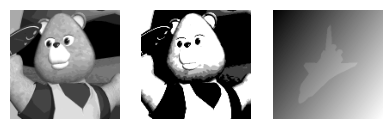

ted, windowed ted, and sshtl
<scaled size: (128 x 128) (128 x 128) (128 x 128) >


In [48]:
import numpy as np
from v4 import vx
from v4 import vd

def window (im, win, level):
    """Window function for image im, returns a uint8 array""" 
    lo = level - win/2
    hi = lo + win
    mf = 255.0/win
    a = im.flatten()
    a [ a < lo] = lo
    a [ a > hi] = hi
    a = (a - lo ) * mf
    return a.reshape(im.shape).astype('uint8')

import matplotlib.pyplot as plt
import matplotlib.cm as cm
def plot2d (tm):
    """ simple 2D plot function """
    xx, yy = np.mgrid[0:tm.shape[0], 0:tm.shape[1]]
    fig = plt.figure(figsize=(8, 6))
    ax = fig.gca(projection='3d')
    ax.plot_surface(xx, yy, tm ,rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=1)
    plt.show()
    
vd.dispmvx("ted", window( vx.Vx('ted').i, 64, 128), "sshtl", size=0.6, 
           capt="ted, windowed ted, and sshtl")


### Section 2 Frequency Domain Filtering 
#### 2.1 Image proerties: 
2.1.1 Quick questions:

1. Why two channels?

   The two channels are real and imaginary channel. Fourier transform is a mapping of complex numbers to complex numbers. For sin wave delta functions have imaginary values. The two channels are the magnitude part and phase part of image in frequency domain.

2. What are your window a level settings for  ted.mag:

   window = 117, level = 34 
3. What are your window a level settings for  ted.phase:
   
   window = 10, level = 126 
4. What are the mean, standard deviation, max, and min of ted.mag?

   mean = 12.8142, standard deviation = 2.0895, max = 255, min = 0

5. What are the mean, standard deviation, max, min and min of ted.phase?
   
   mean = 127, standard deviation = 2.7751, max = 255, min = 0

6. Explain the differences between the magnitude and phase statistics. 
   The magnitude has a mean of 12.8142 and its standard deviation is 2.0895, while the phase has a mean of 127 and its standard deviation is 2.7751. In the frequency domain, the magnitude of the image represents the difference between the brightest and darkest peaks in the image, and the phase represents the offset of this waveform compared to the original waveform. So the pixel values of the two images have different distributions.


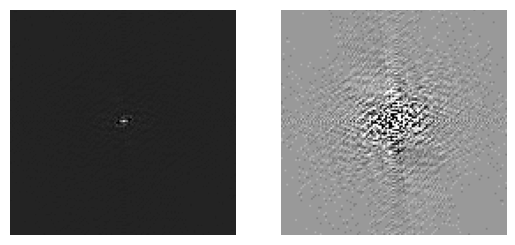

windowed ted.mag, windowed ted.phase
<scaled size: (128 x 128) (128 x 128) >


In [8]:
vd.dispmvx(window( vx.Vx('ted.mag').i, 117, 34), window( vx.Vx('ted.phase').i, 10, 126),  size=0.8, 
           capt="windowed ted.mag, windowed ted.phase")

2.1.2


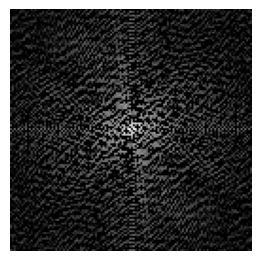

ted.xlmag
<scaled size: (128 x 128) >


In [7]:
vd.dispmvx("ted.xlmag",size = 0.8, capt="ted.xlmag")

6. how was the value selected for bf=

   Using the command" vps ted" in the terminal, the mean pixel value of the image is 110.336. So bf is set to be the negative of the mean pixel value in order to remove the DC offset.
7. Discuss (explain) the result and the method used to create it?
   
   First, the vpix command adds the parameter bval(bf) to all pixels in the original image in order to remove the DC offset and avoid the big value at the location of f=0. Then, the FFT is performed on the changed image. Finally, the vexfft command helps displaying the log magnitude of the image in order to view the image more clearly. As a result, the magnitude data is visualized well.

#### 2.2 Frequency Filtering
1. what is generated by the vgenim command?
    
   It generates a simple shape image. The dimension of the image size is 128x128. The "c" parameter means it is a circle with radius of 32. The "hi" parameter specifies the high pixel value as 1.
   
2. Why is vchan being used?

   vchan is used to merge the two one-channel images"f1" into a two-channel image"fil". 
    

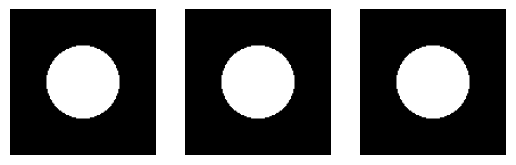

f1.mag, fil.mag, fil.phase 
<scaled size: (128 x 128) (128 x 128) (128 x 128) >


In [20]:
vd.dispmvx('f1.mag', 'fil.mag','fil.phase',  size=0.8, capt="f1.mag, fil.mag, fil.phase ")

The first image shows the magnitude of f1, which is a one-channel image, so there is no phase information. The second and the third images show magnitude and phase of fil. In frequency domain, fil is a hollow circle, and it is a low-pass filter that let the pixels inside the circle pass.

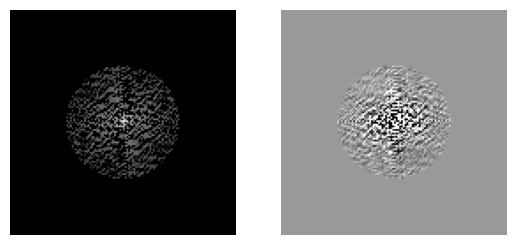

Log magnitude of tedf.fft, windowed phase of tedf.fft
<scaled size: (128 x 128) (128 x 128) >


In [16]:
vd.dispmvx('tedf.mag', window( vx.Vx('tedf.phase').i, 10, 126),  size=0.8, 
           capt="Log magnitude of tedf.fft, windowed phase of tedf.fft")

These two images show the result of " vop -mul if=ted.fft ig=fil of=tedf.fft", which multiplies the image ted.fft and fil. In the frequency domain, the filtering is done by the product of the image and the filter. As the two images show, fil let the pixels inside the circle pass through and the high frequency pixels outside the circle are removed. 

In order to show the magnitude clearly, '-l' in the vexfft command is used to take the log (modified) before scaling.

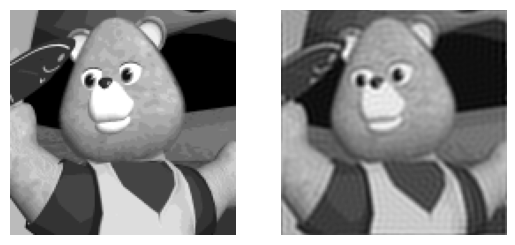

original ted, filtered ted
<scaled size: (128 x 128) (128 x 128) >


In [21]:
vd.dispmvx('ted','tednew.mag',size = 0.8,capt='original ted, filtered ted')

The filtered image is more blurred than the original, which is a characteristic of the low-pass filter. Also, some noise of the image disappears because the high frequency pixels are removed. The edges of the bear became smoother than the original image, for example, in the filtered image, the bear's undershirt and the inner lining of the clothes did not have a clear line of demarcation.

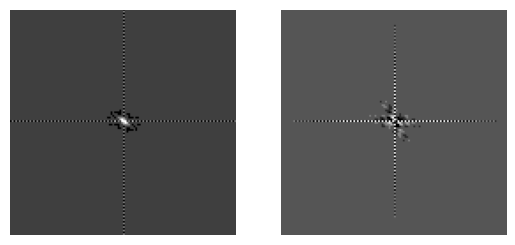

windowed sshtl.mag, windowed sshtl.phase
<scaled size: (128 x 128) (128 x 128) >


In [25]:
vd.dispmvx(window( vx.Vx('sshtl.mag').i, 4, 2), window( vx.Vx('sshtl.phase').i, 6, 128),  size=0.8, 
           capt="windowed sshtl.mag, windowed sshtl.phase")

Now repeat the above filtering procedure and analysis with the image sshtl. First, The above two figures show the windowed magnitude and phase diagrams of the original sshtl after the Fourier transformation.

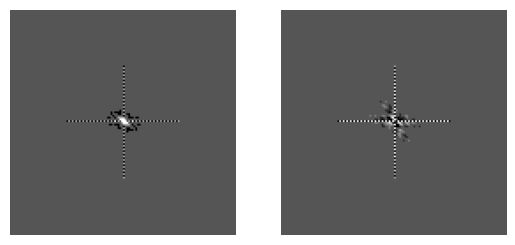

windowed magnitude of sshtlf.fft, windowed phase of sshtlf.fft
<scaled size: (128 x 128) (128 x 128) >


In [37]:
vd.dispmvx(window( vx.Vx('sshtlf.mag').i, 4, 1), window( vx.Vx('sshtlf.phase').i, 6, 128),  size=0.8, 
           capt="windowed magnitude of sshtlf.fft, windowed phase of sshtlf.fft")

Second, use vop command to apply the low-pass filter. The two images show the windowed magnitude and phase of the sshtl after filtering. To facilitate comparison with the previous diagram, the same window and level are used. In the frequency domain, the circular low-pass filter restricts the high-frequency pixels outside the circle and preserves the low-frequency inside the circle.

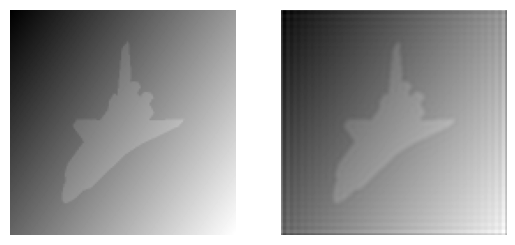

original sshtl, filtered sshtl
<scaled size: (128 x 128) (128 x 128) >


In [27]:
vd.dispmvx('sshtl','sshtlnew.mag',size = 0.8,capt='original sshtl, filtered sshtl')

Finally, use vfft -i command to compute the inverse FFT. Similar to the changes produced on the previous ted image, the filtered sshtl is more blurred and no clear object boundaries are visible. In addition, the background of filtered sshtl has small mosaic squares. 

### 3 Spatial Domain Filtering

#### 3.1 Kernel Generation

1. What does the spatial filter look like?

   In the 2D diagram, the spatial filter is a 4*4 square with different frequencies. In the 3D diagram, the spatial filter has a square bottom and a gradually raised center.
2. How was the tf= parameter selected?
   
   In order to make the pixel values of the output image of convolution range from 0 to 255, the sum of pixels of the convolution kernel should be equal to 1. sf2 has 100 pixels, so the mean pixel value of the kernel should be 1/100. The vps command shows that sf2 has the mean pixel value of 2.56. So tf is set to 1/100/2.56, so that guarantee the output of convolution.

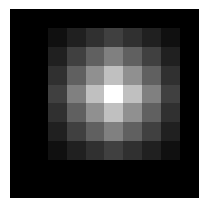

2D diagram of sfil
<scaled size: (10 x 10) >


In [66]:
vd.dispmvx('sfil',capt='2D diagram of sfil')

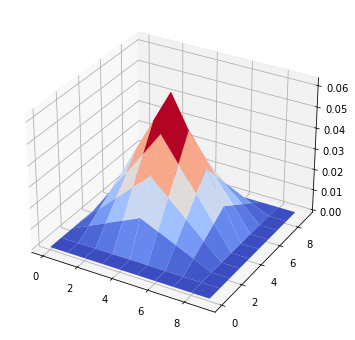

In [68]:
plot2d(vx.Vx('sfil').i)

#### 3.2 Image convolution


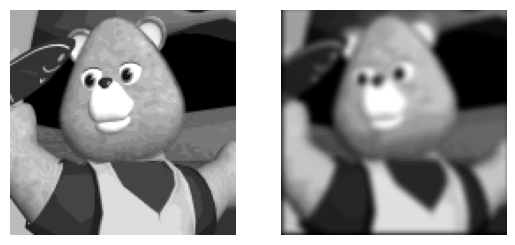

original ted, filtered ted with sfil
<scaled size: (128 x 128) (128 x 128) >


In [70]:
vd.dispmvx('ted','ted.sf',size = 0.8,capt='original ted, filtered ted with sfil')

The filtered image is more blurred than the original, and the noise has largely been removed. The outline lines of the bear are smooth, but it also loses some details, such as the light reflection in the eyes.

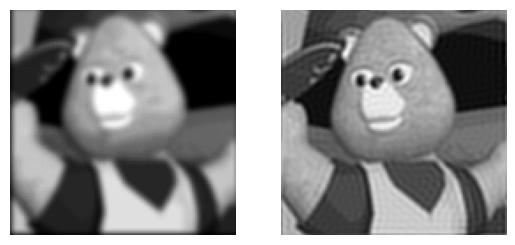

filtered ted with sfil, filtered ted with fil
<scaled size: (128 x 128) (128 x 128) >


In [69]:
vd.dispmvx('ted.sf','tednew.mag',size = 0.8,capt='filtered ted with sfil, filtered ted with fil')

The left graph is the result after sfil filtering, and the right graph is the result after fil filtering. The left image is more blurred and loses more detail. Correspondingly, the right image has more noise and less smooth lines. This is because the fil filter is a low-pass filter with a cutoff in high frequency, which causes Gibbs phenomenon. However, the transition from low to high frequencies is gradual in the sfil filter, so the left image looks  smoother.

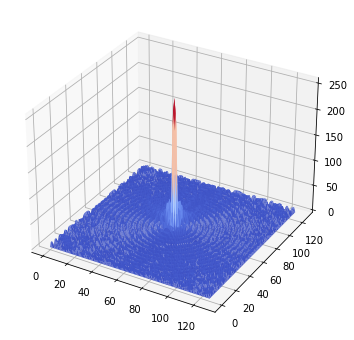

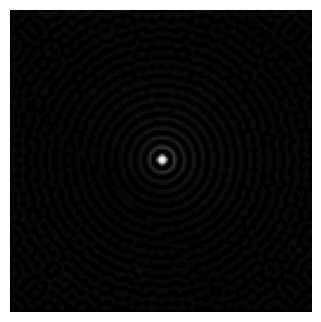

2D graph of fil in the spatial domain
<scaled size: (128 x 128) >


In [73]:
plot2d(vx.Vx('filspace.mag').i)
vd.dispmvx('filspace.mag',capt='2D graph of fil in the spatial domain')

To get the image fil in the spatial domain, the first step is to transform it from the frequency domain to the spacial domain. By using the command "vfft -i", an inverse FFT is done. Second, the " vexfft -m -l" command is used to show the log magnitude of the fil image, which is a clear result of the image. Finally, plot2d and vx.dispmvx are used to display 3d and 2d images respectively. The 3D and 2D graph show that the highest peak is in the middle of the image.

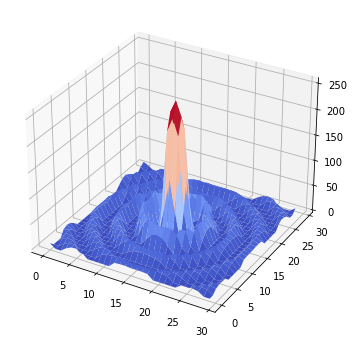

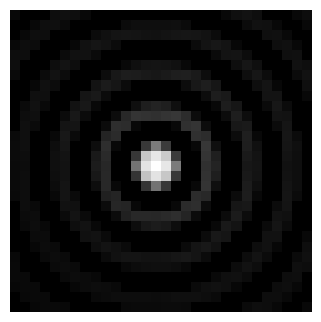

a central region of 2D graph of fil in the spatial domain
<scaled size: (30 x 30) >


In [79]:
plot2d(vx.Vx('filspace_clip.mag').i)
vd.dispmvx('filspace_clip.mag',capt='a central region of 2D graph of fil in the spatial domain')

By using vclip command, a central region of the fil image is selected for display for a clearer presentation. As the enlarged images show, the filter function is a sinc function. It has the highest peak at the center and decreases in a wavy pattern in all directions.